# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 04 · Notebook 07 — Central Limit Theorem and Statistical Foundations
**Instructor:** Amir Charkhi  |  **Goal:** Master the most beautiful theorem in statistics and unlock the power of inference.

> Format: short theory → quick practice → build understanding → mini-challenges.


---
## Learning Objectives
- Understand and apply the Central Limit Theorem (the magic behind statistics!)
- Explain the Law of Large Numbers and why bigger is better
- Use normal approximation to solve real business problems
- Understand confidence intervals and what they really mean
- Apply these concepts to make data-driven business decisions

## 1. The Central Limit Theorem: Pure Magic
**The most important theorem in statistics**: No matter what your data looks like, sample means become beautifully normal!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for nice plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)
%matplotlib inline

In [2]:
# The Central Limit Theorem in plain English
clt_facts = {
    "🎯 The Promise": "Sample means become normal, regardless of original distribution",
    "📊 What You Need": "Many samples of the same size (usually n ≥ 30)",
    "🔮 The Magic": "Works for ANY distribution - uniform, skewed, bimodal, anything!",
    "📐 The Math": "Mean of sample means = population mean (μ)",
    "📏 The Spread": "Standard error = population std / √n",
    "⚡ The Power": "Enables statistical inference and confidence intervals"
}

print("🎪 The Central Limit Theorem: Statistics' Greatest Show!")
for key, value in clt_facts.items():
    print(f"   {key}: {value}")
    
print("\n💫 This theorem is why we can make big conclusions from small samples!")

🎪 The Central Limit Theorem: Statistics' Greatest Show!
   🎯 The Promise: Sample means become normal, regardless of original distribution
   📊 What You Need: Many samples of the same size (usually n ≥ 30)
   🔮 The Magic: Works for ANY distribution - uniform, skewed, bimodal, anything!
   📐 The Math: Mean of sample means = population mean (μ)
   📏 The Spread: Standard error = population std / √n
   ⚡ The Power: Enables statistical inference and confidence intervals

💫 This theorem is why we can make big conclusions from small samples!


## 2. CLT in Action: The Transformation

In [3]:
# Create wildly different population distributions
np.random.seed(42)
n_population = 10000

# 1. Uniform (flat as a pancake)
uniform_pop = np.random.uniform(0, 10, n_population)

# 2. Exponential (extremely right-skewed)
exponential_pop = np.random.exponential(2, n_population)

# 3. Bimodal (two humps)
bimodal_pop = np.concatenate([
    np.random.normal(3, 0.8, n_population//2),
    np.random.normal(8, 0.8, n_population//2)
])

populations = {
    'Uniform': uniform_pop,
    'Exponential': exponential_pop,
    'Bimodal': bimodal_pop
}

print("🎭 Our Test Populations:")
for name, pop in populations.items():
    print(f"   {name}: mean={np.mean(pop):.2f}, std={np.std(pop):.2f}")
    
print("\nThese look nothing like normal distributions - let's see the magic!")

🎭 Our Test Populations:
   Uniform: mean=4.94, std=2.88
   Exponential: mean=2.04, std=2.04
   Bimodal: mean=5.50, std=2.61

These look nothing like normal distributions - let's see the magic!


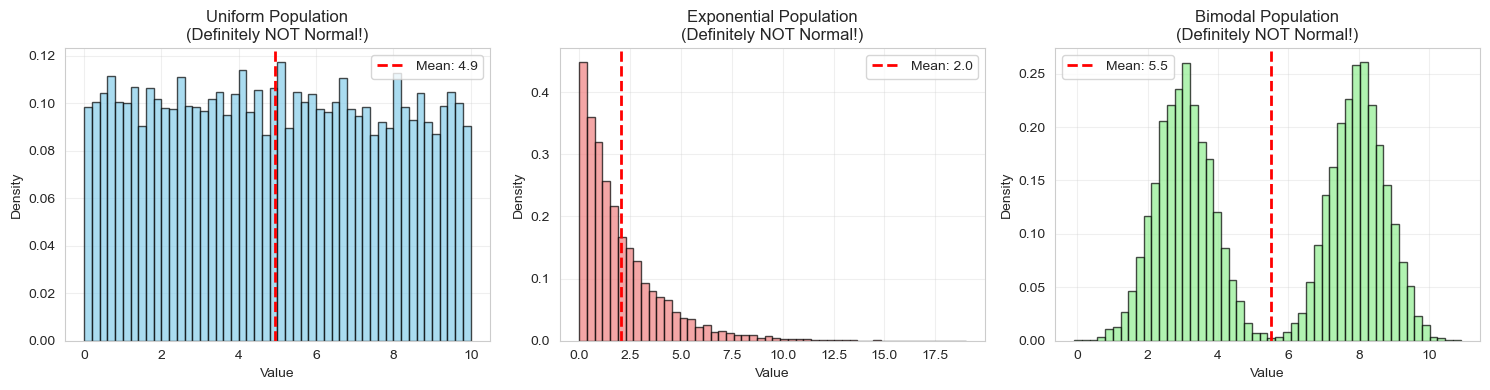

🎨 Original populations: weird shapes, different patterns


In [4]:
# Show the original populations
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['skyblue', 'lightcoral', 'lightgreen']

for i, (name, pop) in enumerate(populations.items()):
    axes[i].hist(pop, bins=50, density=True, alpha=0.7, color=colors[i], edgecolor='black')
    axes[i].set_title(f'{name} Population\n(Definitely NOT Normal!)')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')
    axes[i].axvline(np.mean(pop), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(pop):.1f}')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("🎨 Original populations: weird shapes, different patterns")

### 2.1 The Magical Transformation

In [5]:
# Function to demonstrate CLT
def demonstrate_clt(population, sample_size, num_samples=1000):
    """Take many samples and return their means"""
    sample_means = []
    
    for i in range(num_samples):
        # Take a random sample
        sample = np.random.choice(population, size=sample_size, replace=True)
        # Calculate and store the sample mean
        sample_means.append(np.mean(sample))
    
    return np.array(sample_means)

# Test with exponential distribution (most skewed)
sample_sizes = [5, 15, 30, 100, 500, 1000]
pop = exponential_pop
pop_mean = np.mean(pop)
pop_std = np.std(pop)

print(f"🧪 CLT Experiment with Exponential Distribution:")
print(f"   Population: mean={pop_mean:.2f}, std={pop_std:.2f}")
print(f"\n📊 Sample Size Effect:")
print("Sample Size | Mean of Means | Std of Means | Theoretical SE")
print("-" * 60)

for n in sample_sizes:
    sample_means = demonstrate_clt(pop, n)
    mean_of_means = np.mean(sample_means)
    std_of_means = np.std(sample_means, ddof=1)
    theoretical_se = pop_std / np.sqrt(n)
    
    print(f"    {n:2d}      |     {mean_of_means:5.2f}     |    {std_of_means:5.2f}     |     {theoretical_se:5.2f}")

🧪 CLT Experiment with Exponential Distribution:
   Population: mean=2.04, std=2.04

📊 Sample Size Effect:
Sample Size | Mean of Means | Std of Means | Theoretical SE
------------------------------------------------------------
     5      |      2.00     |     0.87     |      0.91
    15      |      2.02     |     0.53     |      0.53
    30      |      2.04     |     0.37     |      0.37
    100      |      2.03     |     0.20     |      0.20
    500      |      2.04     |     0.09     |      0.09
    1000      |      2.04     |     0.07     |      0.06


C:\Users\bduong\AppData\Local\Temp\ipykernel_1816\1215961173.py:23: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127914 (\N{CIRCUS TENT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


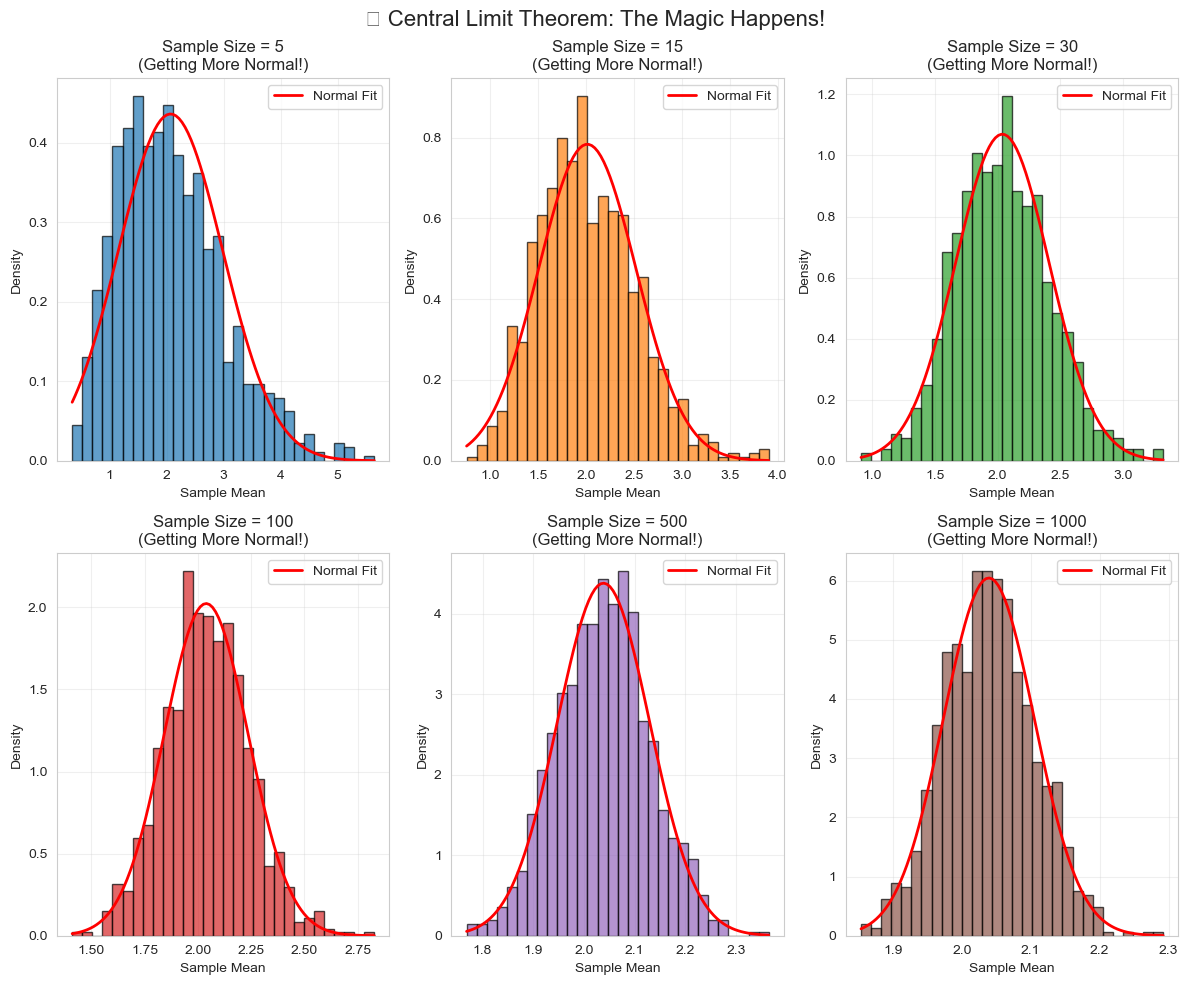

✨ Notice: As sample size increases, the distribution becomes more normal!
🎯 By n=30, it's beautifully normal - regardless of the original shape!


In [6]:
# Visualize the CLT magic
fig, axes = plt.subplots(2, 3, figsize=(12, 10))
axes = axes.ravel()

for i, n in enumerate(sample_sizes):
    sample_means = demonstrate_clt(exponential_pop, n)
    
    axes[i].hist(sample_means, bins=30, density=True, alpha=0.7, 
                color=f'C{i}', edgecolor='black')
    
    # Overlay normal distribution for comparison
    x = np.linspace(sample_means.min(), sample_means.max(), 100)
    normal_curve = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means, ddof=1))
    axes[i].plot(x, normal_curve, 'red', linewidth=2, label='Normal Fit')
    
    axes[i].set_title(f'Sample Size = {n}\n(Getting More Normal!)')
    axes[i].set_xlabel('Sample Mean')
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.suptitle('🎪 Central Limit Theorem: The Magic Happens!', fontsize=16)
plt.tight_layout()
plt.show()

print("✨ Notice: As sample size increases, the distribution becomes more normal!")
print("🎯 By n=30, it's beautifully normal - regardless of the original shape!")

**Exercise 1 — CLT Verification (easy)**  
Test the CLT with a bimodal distribution.


In [7]:
# Your turn - test CLT with the bimodal population
# Use sample size of 50 and take 1000 samples
# Check if the sample means are normally distributed

sample_size = 50
num_samples = 1000

# Your code here


<details>
<summary><b>Solution</b></summary>

```python
# Test CLT with bimodal distribution
bimodal_sample_means = demonstrate_clt(bimodal_pop, sample_size, num_samples)

print(f"🎭 CLT Test with Bimodal Distribution:")
print(f"   Original population mean: {np.mean(bimodal_pop):.2f}")
print(f"   Mean of sample means: {np.mean(bimodal_sample_means):.2f}")
print(f"   Standard error: {np.std(bimodal_sample_means, ddof=1):.2f}")
print(f"   Theoretical SE: {np.std(bimodal_pop)/np.sqrt(sample_size):.2f}")

# Test for normality
stat, p_value = stats.shapiro(bimodal_sample_means[:5000])  # Shapiro-Wilk test
print(f"\n🔬 Normality test p-value: {p_value:.6f}")
if p_value > 0.05:
    print("✅ Sample means are normally distributed!")
else:
    print("❌ Sample means are not quite normal yet")

# Visualize
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(bimodal_pop, bins=50, density=True, alpha=0.7, color='lightgreen')
plt.title('Original Bimodal Population\n(Two Humps)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
plt.hist(bimodal_sample_means, bins=30, density=True, alpha=0.7, color='orange')
# Add normal curve
x = np.linspace(bimodal_sample_means.min(), bimodal_sample_means.max(), 100)
normal_curve = stats.norm.pdf(x, np.mean(bimodal_sample_means), 
                             np.std(bimodal_sample_means, ddof=1))
plt.plot(x, normal_curve, 'red', linewidth=2, label='Normal Fit')
plt.title('Sample Means Distribution\n(Beautiful Bell Curve!)')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

print("🎪 Even with a weird bimodal population, CLT creates normality!")
```
</details>

## 3. Law of Large Numbers: The Convergence Story

### 3.1 The Coin Flip Experiment

In [8]:
# Demonstrate Law of Large Numbers with coin flips
def coin_flip_experiment(max_flips=10000):
    """Show how proportion of heads converges to 0.5"""
    # Simulate coin flips (1 = heads, 0 = tails)
    flips = np.random.binomial(1, 0.5, max_flips)
    
    # Calculate running proportion of heads
    cumulative_heads = np.cumsum(flips)
    flip_numbers = np.arange(1, max_flips + 1)
    running_proportion = cumulative_heads / flip_numbers
    
    return flip_numbers, running_proportion, flips

# Run the experiment
flip_numbers, proportions, flips = coin_flip_experiment()

# Show convergence at different points
checkpoints = [10, 100, 1000, 10000]
print("🪙 Law of Large Numbers - Coin Flip Experiment:")
print("Number of Flips | Proportion of Heads | Distance from 0.5")
print("-" * 55)

for n in checkpoints:
    prop = proportions[n-1]
    distance = abs(prop - 0.5)
    print(f"     {n:5d}      |       {prop:.4f}       |     {distance:.4f}")
    
print(f"\n🎯 As flips increase, proportion gets closer to true probability (0.5)!")

🪙 Law of Large Numbers - Coin Flip Experiment:
Number of Flips | Proportion of Heads | Distance from 0.5
-------------------------------------------------------
        10      |       0.5000       |     0.0000
       100      |       0.5300       |     0.0300
      1000      |       0.4920       |     0.0080
     10000      |       0.5021       |     0.0021

🎯 As flips increase, proportion gets closer to true probability (0.5)!


C:\Users\bduong\AppData\Local\Temp\ipykernel_1816\1584637991.py:26: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\Temp\ipykernel_1816\1584637991.py:26: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129689 (\N{COIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


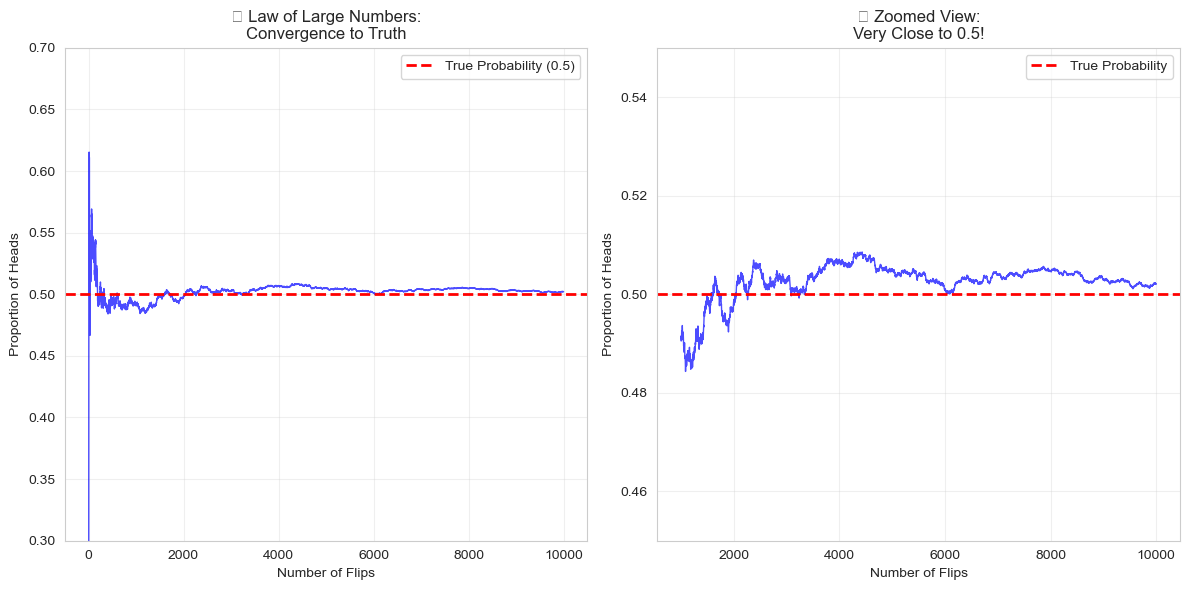

📈 The more data we collect, the closer we get to the truth!


In [9]:
# Visualize Law of Large Numbers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(flip_numbers, proportions, 'b-', alpha=0.7, linewidth=1)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='True Probability (0.5)')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('🪙 Law of Large Numbers:\nConvergence to Truth')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.3, 0.7)

# Zoom in on later part
plt.subplot(1, 2, 2)
start_idx = 1000
plt.plot(flip_numbers[start_idx:], proportions[start_idx:], 'b-', alpha=0.7, linewidth=1)
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='True Probability')
plt.xlabel('Number of Flips')
plt.ylabel('Proportion of Heads')
plt.title('🔍 Zoomed View:\nVery Close to 0.5!')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.45, 0.55)

plt.tight_layout()
plt.show()

print("📈 The more data we collect, the closer we get to the truth!")

## 4. Business Applications: Where the Magic Pays Off

### 4.1 Customer Service Response Times

In [10]:
# Real business scenario: call center response times
np.random.seed(123)

# Population: actual response times (right-skewed)
true_mean_response = 4.8  # minutes 
population_response_times = np.random.exponential(true_mean_response, 50000)

print(f"📞 Call Center Response Time Analysis:")
print(f"   True population mean: {np.mean(population_response_times):.2f} minutes")
print(f"   Population std: {np.std(population_response_times):.2f} minutes")
print(f"   Distribution: Right-skewed (exponential)")

# Daily sampling: measure 50 calls per day for 100 days
daily_sample_size = 50
num_days = 100

daily_averages = []
for day in range(num_days):
    daily_sample = np.random.choice(population_response_times, 
                                  size=daily_sample_size, replace=True)
    daily_averages.append(np.mean(daily_sample))

daily_averages = np.array(daily_averages)

print(f"\n📊 Daily Sampling Results ({num_days} days, {daily_sample_size} calls/day):")
print(f"   Mean of daily averages: {np.mean(daily_averages):.2f} minutes")
print(f"   Std of daily averages: {np.std(daily_averages, ddof=1):.2f} minutes")
print(f"   Theoretical SE: {np.std(population_response_times)/np.sqrt(daily_sample_size):.2f} minutes")

📞 Call Center Response Time Analysis:
   True population mean: 4.81 minutes
   Population std: 4.76 minutes
   Distribution: Right-skewed (exponential)

📊 Daily Sampling Results (100 days, 50 calls/day):
   Mean of daily averages: 4.85 minutes
   Std of daily averages: 0.63 minutes
   Theoretical SE: 0.67 minutes


C:\Users\bduong\AppData\Local\Temp\ipykernel_1816\2400603943.py:25: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\Temp\ipykernel_1816\2400603943.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128222 (\N{TELEPHONE RECEIVER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


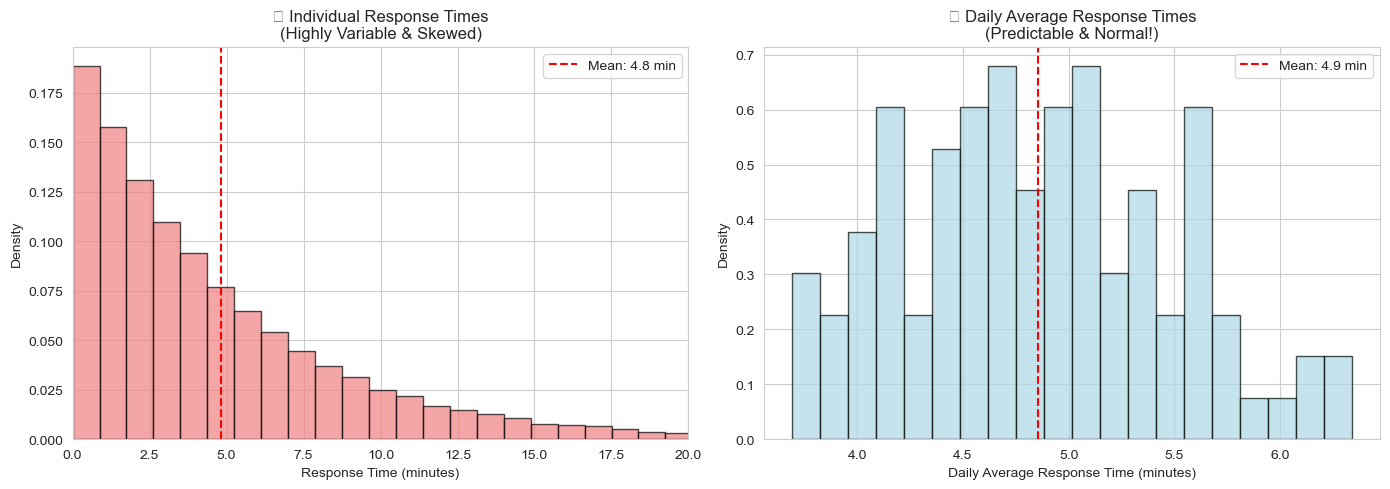

💼 Business Impact: CLT transforms chaotic individual data into predictable patterns!


In [11]:
# Visualize the business transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original population (messy reality)
axes[0].hist(population_response_times, bins=50, density=True, alpha=0.7, 
            color='lightcoral', edgecolor='black')
axes[0].set_title('📞 Individual Response Times\n(Highly Variable & Skewed)')
axes[0].set_xlabel('Response Time (minutes)')
axes[0].set_ylabel('Density')
axes[0].axvline(np.mean(population_response_times), color='red', linestyle='--', 
               label=f'Mean: {np.mean(population_response_times):.1f} min')
axes[0].legend()
axes[0].set_xlim(0, 20)

# Daily averages (manageable insights)
axes[1].hist(daily_averages, bins=20, density=True, alpha=0.7, 
            color='lightblue', edgecolor='black')
axes[1].set_title('📊 Daily Average Response Times\n(Predictable & Normal!)')
axes[1].set_xlabel('Daily Average Response Time (minutes)')
axes[1].set_ylabel('Density')
axes[1].axvline(np.mean(daily_averages), color='red', linestyle='--', 
               label=f'Mean: {np.mean(daily_averages):.1f} min')
axes[1].legend()

plt.tight_layout()
plt.show()

print("💼 Business Impact: CLT transforms chaotic individual data into predictable patterns!")

### 4.2 Quality Control Application

In [12]:
# Manufacturing example: product weights
target_weight = 500  # grams
process_std = 12     # grams
batch_size = 25      # items tested per batch

# CLT tells us what to expect for batch averages
batch_mean_std = process_std / np.sqrt(batch_size)

print(f"⚖️ Quality Control Using CLT:")
print(f"   Target weight: {target_weight}g")
print(f"   Individual item std: {process_std}g")
print(f"   Batch size: {batch_size} items")
print(f"   Standard error of batch means: {batch_mean_std:.2f}g")

# Control limits (99.7% of batch means should fall within ±3 SE)
lower_limit = target_weight - 3 * batch_mean_std
upper_limit = target_weight + 3 * batch_mean_std

print(f"\n🚨 Control Limits for Batch Averages:")
print(f"   Lower limit: {lower_limit:.1f}g")
print(f"   Upper limit: {upper_limit:.1f}g")
print(f"   Any batch average outside these limits signals a problem!")

# Probability calculations
prob_in_control = 0.997  # 99.7% within 3 standard errors
prob_false_alarm = 1 - prob_in_control

print(f"\n📊 Expected Performance:")
print(f"   Batches within limits: {prob_in_control:.1%}")
print(f"   False alarm rate: {prob_false_alarm:.1%}")
print(f"   Out of 1000 batches, expect ~{prob_false_alarm * 1000:.0f} false alarms")

⚖️ Quality Control Using CLT:
   Target weight: 500g
   Individual item std: 12g
   Batch size: 25 items
   Standard error of batch means: 2.40g

🚨 Control Limits for Batch Averages:
   Lower limit: 492.8g
   Upper limit: 507.2g
   Any batch average outside these limits signals a problem!

📊 Expected Performance:
   Batches within limits: 99.7%
   False alarm rate: 0.3%
   Out of 1000 batches, expect ~3 false alarms


**Exercise 2 — A/B Testing Power (medium)**  
Use CLT to design an A/B test for website conversion rates.


In [13]:
# A/B test scenario: website conversion optimization
# Version A: current site (5% conversion rate)
# Version B: new design (hoping for improvement)

current_conversion_rate = 0.05  # 5%
visitors_per_version = 1000

# Your tasks:
# 1. Simulate conversions for both versions (assume B is actually 7%)
# 2. Calculate the difference in conversion rates
# 3. Use CLT to estimate if the difference is significant
# 4. Determine if we can detect a 2% improvement

true_rate_a = 0.05
true_rate_b = 0.07  # Unknown to us in real scenario

# Your code here


<details>
<summary><b>Solution</b></summary>

```python
# Task 1: Simulate A/B test results
np.random.seed(456)
conversions_a = np.random.binomial(visitors_per_version, true_rate_a)
conversions_b = np.random.binomial(visitors_per_version, true_rate_b)

rate_a = conversions_a / visitors_per_version
rate_b = conversions_b / visitors_per_version

print(f"🌐 A/B Test Results:")
print(f"   Version A: {conversions_a}/{visitors_per_version} = {rate_a:.3f} ({rate_a:.1%})")
print(f"   Version B: {conversions_b}/{visitors_per_version} = {rate_b:.3f} ({rate_b:.1%})")

# Task 2: Calculate difference
observed_difference = rate_b - rate_a
true_difference = true_rate_b - true_rate_a
print(f"   Observed difference: {observed_difference:.3f} ({observed_difference:.1%})")
print(f"   True difference: {true_difference:.3f} ({true_difference:.1%})")

# Task 3: Use CLT for significance testing
# Standard error for proportion difference
se_a = np.sqrt(rate_a * (1 - rate_a) / visitors_per_version)
se_b = np.sqrt(rate_b * (1 - rate_b) / visitors_per_version)
se_difference = np.sqrt(se_a**2 + se_b**2)

# Z-score for the observed difference
z_score = observed_difference / se_difference
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test

print(f"\n📊 Statistical Analysis:")
print(f"   Standard error of difference: {se_difference:.4f}")
print(f"   Z-score: {z_score:.2f}")
print(f"   P-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"   Result: 🎉 Statistically significant! Version B is better.")
else:
    print(f"   Result: 😐 Not statistically significant. Need more data.")

# Task 4: Power analysis - can we detect 2% improvement?
effect_size = 0.02  # 2% improvement
pooled_rate = (true_rate_a + true_rate_b) / 2
pooled_se = np.sqrt(2 * pooled_rate * (1 - pooled_rate) / visitors_per_version)

# Minimum Z-score needed for significance
critical_z = 1.96  # 95% confidence
minimum_detectable_effect = critical_z * pooled_se

print(f"\n🔍 Power Analysis:")
print(f"   Minimum detectable effect: {minimum_detectable_effect:.3f} ({minimum_detectable_effect:.1%})")
print(f"   Target effect size: {effect_size:.3f} ({effect_size:.1%})")

if effect_size > minimum_detectable_effect:
    print(f"   Power: ✅ Test can detect 2% improvement")
else:
    needed_sample = 2 * pooled_rate * (1 - pooled_rate) * (critical_z / effect_size)**2
    print(f"   Power: ❌ Test underpowered. Need ~{needed_sample:.0f} visitors per version")

print(f"\n💡 CLT enables us to quantify uncertainty and make data-driven decisions!")
```
</details>

## 5. Confidence Intervals: Quantifying Uncertainty

### 5.1 Understanding Confidence Intervals

In [14]:
# Confidence interval demonstration
population_data = np.random.normal(100, 15, 10000)  # IQ scores
true_mean = np.mean(population_data)
sample_size = 50
num_intervals = 100

# Generate many confidence intervals
confidence_intervals = []
contains_true_mean = []

for i in range(num_intervals):
    # Take a sample
    sample = np.random.choice(population_data, size=sample_size, replace=True)
    sample_mean = np.mean(sample)
    
    # Calculate 95% confidence interval
    standard_error = np.std(sample, ddof=1) / np.sqrt(sample_size)
    margin_of_error = 1.96 * standard_error  # 95% CI
    
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    confidence_intervals.append((ci_lower, ci_upper))
    contains_true_mean.append(ci_lower <= true_mean <= ci_upper)

# Check coverage
coverage_rate = np.mean(contains_true_mean)

print(f"🎯 Confidence Interval Experiment:")
print(f"   True population mean: {true_mean:.2f}")
print(f"   Number of 95% confidence intervals: {num_intervals}")
print(f"   Intervals containing true mean: {sum(contains_true_mean)}")
print(f"   Coverage rate: {coverage_rate:.1%} (should be ~95%)")
print(f"\n💡 95% confidence means 95% of intervals capture the truth!")

🎯 Confidence Interval Experiment:
   True population mean: 99.98
   Number of 95% confidence intervals: 100
   Intervals containing true mean: 96
   Coverage rate: 96.0% (should be ~95%)

💡 95% confidence means 95% of intervals capture the truth!


C:\Users\bduong\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


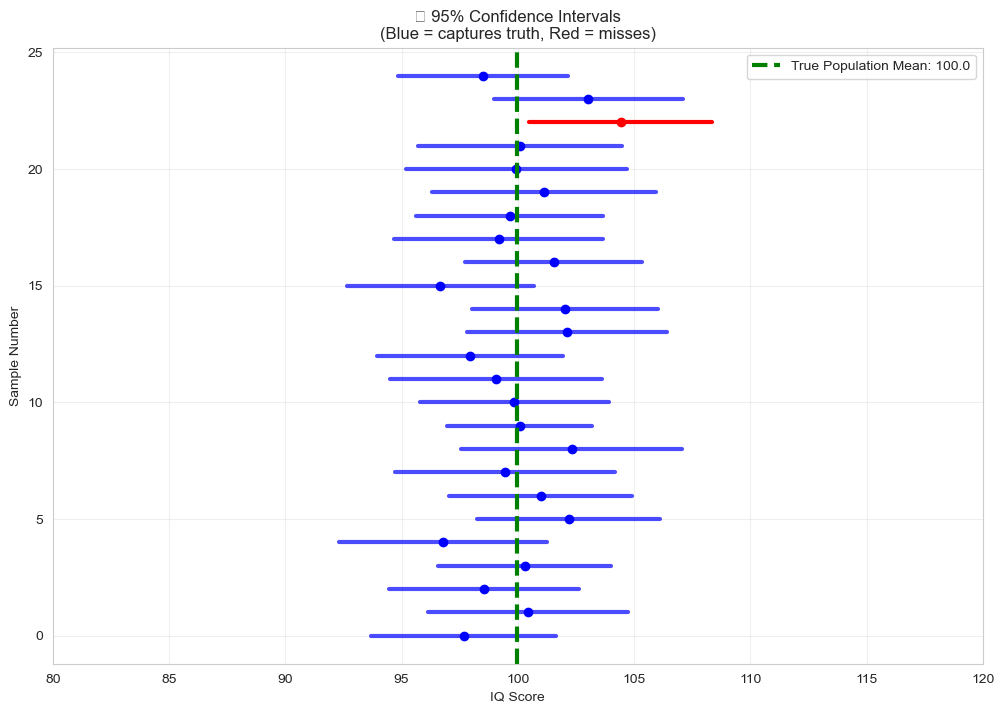

📊 In this visualization: 24/25 intervals capture the truth
🎯 Expected: ~24 out of 25


In [15]:
# Visualize confidence intervals
plt.figure(figsize=(12, 8))

# Plot first 25 confidence intervals
display_count = 25
for i in range(display_count):
    ci_lower, ci_upper = confidence_intervals[i]
    color = 'blue' if contains_true_mean[i] else 'red'
    alpha = 0.7 if contains_true_mean[i] else 1.0
    
    plt.plot([ci_lower, ci_upper], [i, i], color=color, linewidth=3, alpha=alpha)
    
    # Add sample mean point
    sample_mean = (ci_lower + ci_upper) / 2
    plt.plot(sample_mean, i, 'o', color=color, markersize=6)

plt.axvline(true_mean, color='green', linestyle='--', linewidth=3, 
           label=f'True Population Mean: {true_mean:.1f}')
plt.xlabel('IQ Score')
plt.ylabel('Sample Number')
plt.title('🎯 95% Confidence Intervals\n(Blue = captures truth, Red = misses)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(80, 120)
plt.show()

hit_rate = sum(contains_true_mean[:display_count])
print(f"📊 In this visualization: {hit_rate}/{display_count} intervals capture the truth")
print(f"🎯 Expected: ~{0.95 * display_count:.0f} out of {display_count}")

### 5.2 Confidence Interval Calculator

In [16]:
# Practical confidence interval calculator
def calculate_confidence_interval(data, confidence_level=0.95):
    """Calculate confidence interval for sample mean"""
    n = len(data)
    sample_mean = np.mean(data)
    sample_std = np.std(data, ddof=1)
    standard_error = sample_std / np.sqrt(n)
    
    # Z-score for confidence level
    z_scores = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}
    z_score = z_scores[confidence_level]
    
    margin_of_error = z_score * standard_error
    ci_lower = sample_mean - margin_of_error
    ci_upper = sample_mean + margin_of_error
    
    return {
        'sample_mean': sample_mean,
        'standard_error': standard_error,
        'margin_of_error': margin_of_error,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'confidence_level': confidence_level
    }

# Example: Customer satisfaction scores
satisfaction_scores = np.random.normal(7.5, 1.2, 150)  # Scale 1-10
results = calculate_confidence_interval(satisfaction_scores, 0.95)

print(f"📊 Customer Satisfaction Analysis:")
print(f"   Sample size: {len(satisfaction_scores)}")
print(f"   Sample mean: {results['sample_mean']:.2f}")
print(f"   Standard error: {results['standard_error']:.3f}")
print(f"   95% Confidence Interval: [{results['ci_lower']:.2f}, {results['ci_upper']:.2f}]")
print(f"   Margin of Error: ±{results['margin_of_error']:.2f}")

print(f"\n💼 Business Interpretation:")
print(f"   We are 95% confident that the true average satisfaction")
print(f"   is between {results['ci_lower']:.2f} and {results['ci_upper']:.2f}")
print(f"   This helps us set realistic targets and measure progress!")

📊 Customer Satisfaction Analysis:
   Sample size: 150
   Sample mean: 7.37
   Standard error: 0.103
   95% Confidence Interval: [7.17, 7.57]
   Margin of Error: ±0.20

💼 Business Interpretation:
   We are 95% confident that the true average satisfaction
   is between 7.17 and 7.57
   This helps us set realistic targets and measure progress!


**Exercise 3 — Marketing Campaign ROI (hard)**  
Build a complete analysis using CLT and confidence intervals.


In [17]:
# Marketing campaign effectiveness analysis
np.random.seed(789)

# Before campaign: baseline sales data (30 days)
before_mean = 1500  # daily sales
before_std = 200
before_sales = np.random.normal(before_mean, before_std, 30)

# After campaign: improved sales (30 days)
after_mean = 1650  # +150 improvement  
after_sales = np.random.normal(after_mean, before_std, 30)

print(f"💰 Marketing Campaign Analysis:")
print(f"   Before campaign: {len(before_sales)} days of data")
print(f"   After campaign: {len(after_sales)} days of data")
print(f"   Campaign cost: $50,000")

# Your tasks:
# 1. Calculate confidence intervals for before and after periods
# 2. Estimate the campaign effect with confidence interval
# 3. Calculate ROI and its confidence interval
# 4. Make a business recommendation

# Your code here


💰 Marketing Campaign Analysis:
   Before campaign: 30 days of data
   After campaign: 30 days of data
   Campaign cost: $50,000


<details>
<summary><b>Solution</b></summary>

```python
# Task 1: Calculate confidence intervals for both periods
before_ci = calculate_confidence_interval(before_sales, 0.95)
after_ci = calculate_confidence_interval(after_sales, 0.95)

print(f"\n📊 Task 1 - Period Analysis:")
print(f"Before campaign:")
print(f"   Mean: ${before_ci['sample_mean']:.0f}/day")
print(f"   95% CI: [${before_ci['ci_lower']:.0f}, ${before_ci['ci_upper']:.0f}]")
print(f"After campaign:")
print(f"   Mean: ${after_ci['sample_mean']:.0f}/day")
print(f"   95% CI: [${after_ci['ci_lower']:.0f}, ${after_ci['ci_upper']:.0f}]")

# Task 2: Campaign effect with confidence interval
effect = after_ci['sample_mean'] - before_ci['sample_mean']
# Standard error of difference
se_difference = np.sqrt(before_ci['standard_error']**2 + after_ci['standard_error']**2)
effect_margin = 1.96 * se_difference
effect_ci_lower = effect - effect_margin
effect_ci_upper = effect + effect_margin

print(f"\n🎯 Task 2 - Campaign Effect:")
print(f"   Observed effect: ${effect:.0f}/day increase")
print(f"   95% CI for effect: [${effect_ci_lower:.0f}, ${effect_ci_upper:.0f}]/day")

if effect_ci_lower > 0:
    print(f"   Result: ✅ Statistically significant improvement!")
else:
    print(f"   Result: ❌ Not statistically significant")

# Task 3: ROI analysis
campaign_cost = 50000
days_in_month = 30
monthly_effect = effect * days_in_month
monthly_effect_lower = effect_ci_lower * days_in_month
monthly_effect_upper = effect_ci_upper * days_in_month

# ROI calculation
roi = (monthly_effect - campaign_cost) / campaign_cost
roi_lower = (monthly_effect_lower - campaign_cost) / campaign_cost
roi_upper = (monthly_effect_upper - campaign_cost) / campaign_cost

print(f"\n💵 Task 3 - ROI Analysis:")
print(f"   Monthly revenue increase: ${monthly_effect:,.0f}")
print(f"   95% CI: [${monthly_effect_lower:,.0f}, ${monthly_effect_upper:,.0f}]")
print(f"   Campaign cost: ${campaign_cost:,}")
print(f"   ROI: {roi:.1%}")
print(f"   95% CI for ROI: [{roi_lower:.1%}, {roi_upper:.1%}]")

# Task 4: Business recommendation
print(f"\n🏢 Task 4 - Business Recommendation:")

if roi_lower > 0:
    print(f"   ✅ STRONG RECOMMENDATION: Continue campaign")
    print(f"   • Campaign shows positive ROI with 95% confidence")
    print(f"   • Expected monthly profit: ${monthly_effect - campaign_cost:,.0f}")
    print(f"   • Worst-case scenario still profitable")
elif roi > 0:
    print(f"   ⚠️  CAUTIOUS RECOMMENDATION: Monitor closely")
    print(f"   • Campaign likely profitable but with uncertainty")
    print(f"   • Consider extending test period for more data")
else:
    print(f"   ❌ RECOMMENDATION: Discontinue campaign")
    print(f"   • ROI not convincingly positive")
    print(f"   • Risk of losing money")

print(f"\n💡 CLT enabled us to quantify uncertainty and make informed decisions!")
print(f"📊 Without statistics, we'd just be guessing about campaign effectiveness.")
```
</details>

## 6. Common Misconceptions and Pitfalls

### 6.1 The Gambler's Fallacy

In [18]:
# Demonstrate why "balancing out" is a myth
def analyze_streaks(num_sequences=10000):
    """Analyze what happens after streaks"""
    after_5_heads = []
    
    for _ in range(num_sequences):
        flips = np.random.binomial(1, 0.5, 10)
        
        # Look for 5 heads in a row
        for i in range(5):
            if np.sum(flips[i:i+5]) == 5 and i+5 < len(flips):
                after_5_heads.append(flips[i+5])
    
    if after_5_heads:
        proportion_heads = np.mean(after_5_heads)
        print(f"🎰 Gambler's Fallacy Test:")
        print(f"   After 5 heads in a row, next flip is heads: {proportion_heads:.3f}")
        print(f"   Expected if fair: 0.500")
        print(f"   Sample size: {len(after_5_heads)}")
        
        if abs(proportion_heads - 0.5) < 0.05:
            print(f"   ✅ Confirmed: Each flip is independent!")
        else:
            print(f"   ⚠️ Unusual result - might need more data")
    else:
        print(f"   No 5-head sequences found in {num_sequences} trials")

analyze_streaks()

print(f"\n💡 Key insight: Past results don't influence future independent events!")
print(f"📊 Law of Large Numbers works over MANY trials, not through 'balancing'")

🎰 Gambler's Fallacy Test:
   After 5 heads in a row, next flip is heads: 0.513
   Expected if fair: 0.500
   Sample size: 1668
   ✅ Confirmed: Each flip is independent!

💡 Key insight: Past results don't influence future independent events!
📊 Law of Large Numbers works over MANY trials, not through 'balancing'


### 6.2 Confidence Interval Misinterpretation

In [19]:
# Common confidence interval misconceptions
print("⚠️ Common Confidence Interval Mistakes:")
print()

misconceptions = [
    {
        'wrong': "There's a 95% chance the true parameter is in this interval",
        'right': "If we repeated this process many times, 95% of intervals would contain the true parameter",
        'explanation': "The parameter is fixed; the interval is random"
    },
    {
        'wrong': "95% of the data falls within the confidence interval",
        'right': "The confidence interval is for the population mean, not individual data points",
        'explanation': "CIs are about parameter estimates, not data spread"
    },
    {
        'wrong': "A wider interval means we're less confident",
        'right': "A wider interval reflects more uncertainty in our estimate",
        'explanation': "Confidence level stays the same; precision changes"
    }
]

for i, item in enumerate(misconceptions, 1):
    print(f"{i}. ❌ WRONG: {item['wrong']}")
    print(f"   ✅ RIGHT: {item['right']}")
    print(f"   💡 Why: {item['explanation']}")
    print()

⚠️ Common Confidence Interval Mistakes:

1. ❌ WRONG: There's a 95% chance the true parameter is in this interval
   ✅ RIGHT: If we repeated this process many times, 95% of intervals would contain the true parameter
   💡 Why: The parameter is fixed; the interval is random

2. ❌ WRONG: 95% of the data falls within the confidence interval
   ✅ RIGHT: The confidence interval is for the population mean, not individual data points
   💡 Why: CIs are about parameter estimates, not data spread

3. ❌ WRONG: A wider interval means we're less confident
   ✅ RIGHT: A wider interval reflects more uncertainty in our estimate
   💡 Why: Confidence level stays the same; precision changes



## 7. Mini-Challenges
- **M1 (easy):** Build a sample size calculator for different precision requirements
- **M2 (medium):** Create a CLT demonstration with multiple weird distributions
- **M3 (hard):** Design a complete A/B testing framework with power analysis

In [20]:
# Your turn - try the challenges!
# M1: Calculate sample sizes for customer surveys
# M2: Test CLT with uniform, exponential, and custom distributions  
# M3: Full A/B testing system with statistical power


<details>
<summary><b>Solutions</b></summary>

```python
# M1 - Sample Size Calculator
def sample_size_calculator(population_std, desired_margin, confidence_level=0.95):
    """Calculate required sample size for desired precision"""
    z_scores = {0.90: 1.645, 0.95: 1.96, 0.99: 2.576}
    z = z_scores[confidence_level]
    
    # Formula: n = (z * σ / E)²
    n = (z * population_std / desired_margin) ** 2
    return int(np.ceil(n))

print("🧮 M1 - Sample Size Calculator:")
scenarios = [
    ("Customer satisfaction (1-10)", 2.0, 0.2),
    ("Website load time (seconds)", 0.5, 0.05),
    ("Order value ($)", 50, 5),
    ("Employee productivity (0-100)", 15, 2)
]

for scenario, std, margin in scenarios:
    n_90 = sample_size_calculator(std, margin, 0.90)
    n_95 = sample_size_calculator(std, margin, 0.95)
    n_99 = sample_size_calculator(std, margin, 0.99)
    
    print(f"\n{scenario}:")
    print(f"   For ±{margin} precision: {n_90} (90%), {n_95} (95%), {n_99} (99%)")

# M2 - CLT Demonstration with Multiple Distributions
def test_clt_convergence(distributions, sample_sizes=[5, 15, 30, 100]):
    """Test CLT with multiple distributions"""
    print(f"\n🎪 M2 - CLT Universal Test:")
    
    fig, axes = plt.subplots(len(distributions), len(sample_sizes), 
                            figsize=(16, 4*len(distributions)))
    
    for i, (name, dist) in enumerate(distributions.items()):
        print(f"\nTesting {name} distribution:")
        
        for j, n in enumerate(sample_sizes):
            sample_means = demonstrate_clt(dist, n, 1000)
            
            # Plot
            ax = axes[i, j] if len(distributions) > 1 else axes[j]
            ax.hist(sample_means, bins=30, density=True, alpha=0.7, color=f'C{j}')
            
            # Normal overlay
            x = np.linspace(sample_means.min(), sample_means.max(), 100)
            normal_fit = stats.norm.pdf(x, np.mean(sample_means), np.std(sample_means))
            ax.plot(x, normal_fit, 'red', linewidth=2)
            
            ax.set_title(f'{name}\nn={n}')
            ax.grid(True, alpha=0.3)
            
            # Normality test
            _, p_val = stats.shapiro(sample_means[:5000])
            normal_enough = "✅" if p_val > 0.05 else "❌"
            print(f"   n={n}: {normal_enough} (p={p_val:.4f})")
    
    plt.tight_layout()
    plt.show()

# Test with different distributions
test_distributions = {
    'Uniform': np.random.uniform(0, 10, 10000),
    'Exponential': np.random.exponential(2, 10000)
}
test_clt_convergence(test_distributions)

# M3 - Complete A/B Testing Framework
class ABTestFramework:
    def __init__(self, alpha=0.05, power=0.8):
        self.alpha = alpha
        self.power = power
        
    def sample_size_for_proportions(self, p1, p2, alpha=None, power=None):
        """Calculate sample size for proportion A/B test"""
        alpha = alpha or self.alpha
        power = power or self.power
        
        # Effect size
        effect = abs(p2 - p1)
        pooled_p = (p1 + p2) / 2
        
        # Z-scores
        z_alpha = stats.norm.ppf(1 - alpha/2)
        z_beta = stats.norm.ppf(power)
        
        # Sample size calculation
        n = (2 * pooled_p * (1 - pooled_p) * (z_alpha + z_beta)**2) / effect**2
        return int(np.ceil(n))
    
    def analyze_test(self, conversions_a, visitors_a, conversions_b, visitors_b):
        """Analyze A/B test results"""
        rate_a = conversions_a / visitors_a
        rate_b = conversions_b / visitors_b
        
        # Standard errors
        se_a = np.sqrt(rate_a * (1 - rate_a) / visitors_a)
        se_b = np.sqrt(rate_b * (1 - rate_b) / visitors_b)
        se_diff = np.sqrt(se_a**2 + se_b**2)
        
        # Test statistic
        diff = rate_b - rate_a
        z_stat = diff / se_diff
        p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
        
        # Confidence interval for difference
        margin = 1.96 * se_diff
        ci_lower = diff - margin
        ci_upper = diff + margin
        
        return {
            'rate_a': rate_a,
            'rate_b': rate_b,
            'difference': diff,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'z_stat': z_stat,
            'p_value': p_value,
            'significant': p_value < self.alpha
        }

print(f"\n🧪 M3 - A/B Testing Framework:")
ab_test = ABTestFramework()

# Power analysis
baseline_rate = 0.05
improvement = 0.02
new_rate = baseline_rate + improvement

required_n = ab_test.sample_size_for_proportions(baseline_rate, new_rate)
print(f"Required sample size per group: {required_n:,}")

# Simulate test results
np.random.seed(999)
conversions_a = np.random.binomial(required_n, baseline_rate)
conversions_b = np.random.binomial(required_n, new_rate)

results = ab_test.analyze_test(conversions_a, required_n, conversions_b, required_n)

print(f"\nTest Results:")
print(f"   Version A: {conversions_a}/{required_n} = {results['rate_a']:.3f}")
print(f"   Version B: {conversions_b}/{required_n} = {results['rate_b']:.3f}")
print(f"   Difference: {results['difference']:.3f} ({results['difference']:.1%})")
print(f"   95% CI: [{results['ci_lower']:.3f}, {results['ci_upper']:.3f}]")
print(f"   P-value: {results['p_value']:.4f}")
print(f"   Significant: {'✅ Yes' if results['significant'] else '❌ No'}")

print(f"\n💡 Complete A/B testing framework with statistical rigor!")
```
</details>

## Wrap-Up & Course Conclusion
✅ You've mastered the Central Limit Theorem - the foundation of statistical inference  
✅ You understand the Law of Large Numbers and why sample size matters  
✅ You can use normal approximations to solve business problems  
✅ You know what confidence intervals really mean and how to use them  
✅ You can avoid common statistical misconceptions and pitfalls  

**Quick Reference Card:**
- 🎪 **CLT Magic**: Sample means become normal (n ≥ 30)
- 📏 **Standard Error**: σ/√n (bigger samples = smaller error)
- 🎯 **Confidence Intervals**: Quantify uncertainty in estimates
- ⚖️ **95% Confidence**: 95% of intervals contain the true parameter
- 🚫 **Remember**: Each trial is independent (no gambler's fallacy!)

## 🎓 Statistics Foundations Complete!

Congratulations! You've completed an incredible journey through statistics fundamentals:

### What You've Mastered:
1. **📊 Data Types & Visualization** - Choose the right chart for your story
2. **📈 Descriptive Statistics** - Summarize data with mean, median, std dev, and z-scores
3. **🔔 Probability Distributions** - Model real-world phenomena with normal, binomial, uniform
4. **🔗 Correlation & Relationships** - Find connections while avoiding causation traps
5. **👥 Sampling & Populations** - Make big conclusions from small samples
6. **🎪 Central Limit Theorem** - The magic that makes statistical inference possible

### Your Statistical Superpowers:
- Design surveys and experiments that avoid bias
- Calculate confidence intervals for business metrics
- Detect outliers and unusual patterns in data
- Make data-driven decisions with quantified uncertainty
- Communicate statistical findings to non-technical stakeholders

### Next Steps in Your Data Science Journey:
1. **Hypothesis Testing** - Formal statistical tests and p-values
2. **Regression Analysis** - Predict outcomes and understand relationships
3. **Machine Learning** - Algorithms that learn from data
4. **Advanced Statistics** - ANOVA, time series, Bayesian methods

### Final Challenge:
Apply everything you've learned to a real dataset:
1. Find an interesting dataset (Kaggle, government data, company data)
2. Perform complete exploratory data analysis
3. Calculate descriptive statistics and create visualizations
4. Find correlations and test for statistical significance
5. Build confidence intervals for key metrics
6. Write a professional report with business recommendations

**Remember**: Statistics is your superpower for making better decisions with data. Keep practicing, stay curious, and never stop asking "What does the data really tell us?"

🚀 You're now ready to tackle real-world data science challenges with confidence!
